## 3.2 Development of a Noun - Adjective Pair Ranker
*  identify  noun (phrase) - adjective (phrase) pairs

*    rank the pairs from all the review documents



In [1]:
# conda install -c conda-forge spacy
# python -m spacy download en
import spacy 
from spacy import displacy
import pandas as pd 
from pathlib import Path

import matplotlib.pyplot as plt

# conda install -c conda-forge textblob
# python -m textblob.download_corpora
from textblob import TextBlob

nlp = spacy.load("en")

In [2]:
# Read data
data = pd.read_csv("data/koreanspicynoodles_reviews.csv")

# Store all review data
df_data = data.copy()
df_data["noun_adj_pair"] = [list() for x in range(len(df_data.index))] # add a column to contain list of noun_adj_pair

# Store noun adjective pairs
df_pairs = pd.DataFrame(columns=["review_id", "noun","noun_base", "adj","adj_base"])

spacy's Coarse-grained part-of-speech from the [Universal POS tag set](https://universaldependencies.org/docs/u/pos/). 

The [Universal Dependencies scheme](https://universaldependencies.org/u/dep/ ) is used in all languages trained on Universal Dependency Corpora.

### Method 1

For each `Adjective` in a review, find the **nearest** `Noun` (NOUN/PROPN) from its syntactic dependency parsing.

Pairs obtained from this method are saved in `noun_adj_pairs_has_break.csv` for analysis purpose.

In [3]:
# Method 1
# For each Adjective in a sentence
# Find the nearest Noun (NOUN/PROPN) from its syntactic dependency parsing

df_pairs_has_break = df_pairs.copy()

for reviewIndex,row in df_data.iterrows():
    doc = nlp(row["text"])

    for i,token in enumerate(doc):
        if token.pos_ == "ADJ":
            for anc in token.ancestors:
                if anc.pos_ in ('NOUN','PROPN'):
                    # add pair to df_pairs_has_break
                    new_row = {"review_id":reviewIndex,"noun":anc.text,"noun_base":anc.lemma_,"adj":token.text,"adj_base":token.lemma_}
                    df_pairs_has_break = df_pairs_has_break.append(new_row, ignore_index=True) # add pair
                    break # only find nearest noun
                    
# Save pairs found by this method in a csv file
df_pairs_has_break.to_csv("output/noun_adj_pairs_has_break.csv")

In [4]:
df_pairs_has_break

,review_id,noun,noun_base,adj,adj_base
0,0,flavor,flavor,wonderful,wonderful
1,1,sauce,sauce,spicy,spicy
2,1,dumplings,dumpling,frozen,frozen
3,2,prices,price,lower,low
4,3,noodles,noodle,best,good
5,3,food,food,spicy,spicy
6,3,sauce,sauce,spicy,spicy
7,3,flakes,flake,nori,nori
8,3,sauce,sauce,little,little
9,3,sauce,sauce,less,less


### Method 2
Similar to Method 1

For each `Adjective` in a review, find **all** the `Noun` (NOUN/PROPN) from its syntactic dependency parsing.

Pairs obtained from this method are saved in `noun_adj_pairs_no_break.csv` for analysis purpose.

In [5]:
df_pairs_no_break = df_pairs.copy()

for reviewIndex,row in df_data.iterrows():
    doc = nlp(row["text"])

    for i,token in enumerate(doc):
        if token.pos_ == "ADJ":
            for anc in token.ancestors:
                if anc.pos_ in ('NOUN','PROPN'):
                    # add pair to df_pairs_no_break
                    new_row = {"review_id":reviewIndex,"noun":anc.text,"noun_base":anc.lemma_,"adj":token.text,"adj_base":token.lemma_}
                    df_pairs_no_break = df_pairs_no_break.append(new_row, ignore_index=True) # add pair
                    # no break, continue loop to find all nouns
                    
# Save pairs found by this method in a csv file
df_pairs_no_break.to_csv("output/noun_adj_pairs_no_break.csv")

In [6]:
df_pairs_no_break

,review_id,noun,noun_base,adj,adj_base
0,0,flavor,flavor,wonderful,wonderful
1,1,sauce,sauce,spicy,spicy
2,1,dumplings,dumpling,frozen,frozen
3,2,prices,price,lower,low
4,2,levels,level,lower,low
5,3,noodles,noodle,best,good
6,3,hands,hand,best,good
7,3,food,food,spicy,spicy
8,3,sauce,sauce,spicy,spicy
9,3,packet,packet,spicy,spicy


### Method 3
For each `Noun` (NOUN/PROPN) in a review, find the all the `Adjective` from its syntactic dependency parsing, by finding the syntactic dependency label `amod`.

Pairs obtained from this method are used to find the ranking of pairs and are saved in `noun_adj_pairs.csv`.

In [7]:
for reviewIndex,row in df_data.iterrows():
    doc = nlp(row["text"])

    for i,token in enumerate(doc):
        if token.pos_ in ('NOUN','PROPN'):
            for child in token.children:                    
                if child.dep_ == "amod":
                    # add pair
                    row["noun_adj_pair"].append((token.text,child.text))
                    new_row = {"review_id":reviewIndex,"noun":token.text,"noun_base":token.lemma_,"adj":child.text,"adj_base":child.lemma_}
                    df_pairs = df_pairs.append(new_row, ignore_index=True) # add pair
                    break # only find nearest noun
                    
df_pairs.to_csv("output/noun_adj_pairs.csv")
df_pairs

,review_id,noun,noun_base,adj,adj_base
0,0,flavor,flavor,wonderful,wonderful
1,1,sauce,sauce,spicy,spicy
2,1,dumplings,dumpling,frozen,frozen
3,2,prices,price,lower,low
4,3,noodles,noodle,best,good
5,3,food,food,spicy,spicy
6,3,sauce,sauce,spicy,spicy
7,3,sauce,sauce,little,little
8,4,challenge,challenge,real,real
9,4,supermarket,supermarket,asian,asian


In [8]:
# print to see results of df_data['noun_adj_pair']
for index, row in df_data.iterrows():
    print("\n","index =",index , row['noun_adj_pair'])


 index = 0 [('flavor', 'wonderful')]

 index = 1 [('sauce', 'spicy'), ('dumplings', 'frozen')]

 index = 2 [('prices', 'lower')]

 index = 3 [('noodles', 'best'), ('food', 'spicy'), ('sauce', 'spicy'), ('sauce', 'little')]

 index = 4 [('challenge', 'real'), ('supermarket', 'asian'), ('pack', 'single'), ('pack', 'large'), ('flavors', 'different')]

 index = 5 [('flavor', 'much'), ('noodles', 'regular'), ('market', 'local')]

 index = 6 [('tolerance', 'high')]

 index = 7 [('seaweed', 'added'), ('challenge', 'spicy')]

 index = 8 [('noodles', 'perfect'), ('amount', 'efficient'), ('sauce', 'red'), ('side', 'sunny'), ('egg', 'side'), ('style', 'julian'), ('meal', 'complete'), ('bite', 'quick'), ('spice', 'much'), ('bag', 'whole')]

 index = 9 [('seaweed', 'added'), ('challenge', 'spicy')]

 index = 10 [('problem', 'biggest')]

 index = 11 [('SAUCE', 'LITTLE'), ('spice', 'much')]

 index = 12 [('food', 'spicy')]

 index = 13 [('ramen', 'Spicy'), ('food', 'spicy'), ('version', 'spicy')]

 

### Display a review's dependency parse

In [9]:
# Example of a review's dependency parse
review_index = 4
test_doc = nlp(df_data.iloc[review_index]["text"])
print(test_doc)
displacy.render (test_doc, style='dep', jupyter=True)

# save visualisation as file
svg = displacy.render (test_doc, style='dep', jupyter=False)
output_path = Path("output/DependencyParseExample.svg")
output_path.open("w", encoding="utf-8").write(svg)

If you're looking for a real food challenge these noodles will give you a run for your money. They can be found at any asian supermarket and are very inexpensive. You can buy them as single pack, noodle bowl, or a large pack. They also come in different flavors such as chicken, carbonara, and more. Extremely spicy but extremely delicious.


48464

### Rank pairs according to frequency

In [10]:
# columns = noun_base, adj_base, freq
df_pairs_rank = df_pairs[['noun_base','adj_base']]
# groupby and store fre in column="freq"
df_pairs_rank = df_pairs_rank.groupby(df_pairs_rank.columns.tolist()).size().reset_index().rename(columns={0:'freq'})
# sort dataframe by freq, highest at top
df_pairs_rank = df_pairs_rank.sort_values(by="freq", ascending=False)

In [11]:
df_pairs_rank

,noun_base,adj_base,freq
19,food,spicy,5
33,noodle,spicy,3
6,challenge,spicy,3
53,spice,much,2
41,raman,spicy,2
22,item,spicy,2
47,seaweed,add,2
15,flavor,good,2
43,sauce,little,2
45,sauce,spicy,2


In [12]:
df_pairs_rank.nlargest(5, 'freq')

,noun_base,adj_base,freq
19,food,spicy,5
33,noodle,spicy,3
6,challenge,spicy,3
53,spice,much,2
41,raman,spicy,2


In [13]:
# Show count of each number of freq
print("freq, no of pairs")
df_pairs_rank['freq'].value_counts().sort_index(ascending = False)

freq, no of pairs


5     1
3     2
2     9
1    49
Name: freq, dtype: int64

## 3.3 Application
using same reviews, classify the sentences into positive, neutral, and negative classes based on their sentiments

In [14]:
# https://textblob.readthedocs.io/en/dev/

In [15]:
df_senti = data.copy()
df_senti["polarity"] = 0

# Calculate polarity score, a float within the range [-1.0, 1.0]
for i, row in df_senti.iterrows():
    sentence = TextBlob(row["text"])
    df_senti.loc [i, "polarity"] = sentence.sentiment.polarity
    
# Classify each review under one of the sentiment: positive, neutral or negative
# based on its polarity value
df_senti["sentiment"] = ""
for i, row in df_senti.iterrows():
    neutralMax = 0.01
    neutralMin = -0.01
    senti = row["polarity"]
    if senti >neutralMax:
        s = "positive"
    elif senti < neutralMin:
        s = "negative"
    else:
        s = "neutral"
    df_senti.loc [i, "sentiment"] = s
    
# The polarity score is a float within the range [-1.0, 1.0].
# 1.0 = most positive
# -1.0 = most negative
df_senti

,text,rate,source,polarity,sentiment
0,"I bought these for my girls and husband, they ...",5,amazon,0.562500,positive
1,"Yeah, here's the thing...they DO taste like bu...",5,amazon,0.516667,positive
2,This were incredible. Tastes just like the ram...,5,amazon,0.506944,positive
3,This is hands down the best ramen noodles ever...,5,influenster,0.292535,positive
4,If you're looking for a real food challenge th...,5,influenster,0.119805,positive
5,These noodles are sooo good . So much flavor! ...,5,influenster,0.203750,positive
6,I first got this ramen because I love spicy fo...,5,influenster,0.340303,positive
7,Wow if you're keys disappointed by ramens not ...,5,influenster,0.086538,positive
8,I love these. It’s the perfect instant dried n...,5,influenster,0.123958,positive
9,Wow if you're keys disappointed by ramens not ...,5,influenster,0.086538,positive


In [16]:
# Show count of each sentiment: positive, neutral or negative
df_senti['sentiment'].value_counts().sort_index()

negative     6
neutral      2
positive    22
Name: sentiment, dtype: int64

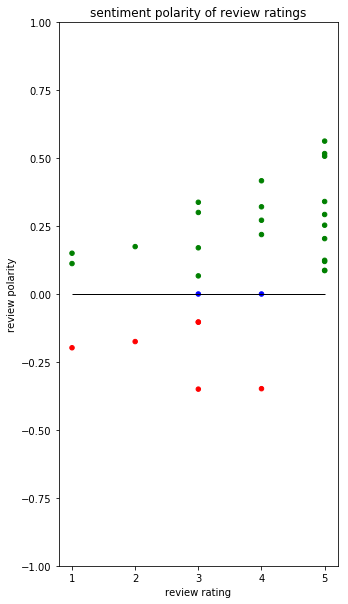

In [17]:
# plot
# review rating = 1 or 2 or 3 or 4 or 5

colors = {'positive':'green', 'neutral':'blue', 'negative':'red'}

plt.figure(figsize=(5,10)) # resize plot
# plt.scatter(x=df_senti.rate, y=df_senti.polarity)
plt.scatter(x=df_senti["rate"], y=df_senti["polarity"],s=20,c=df_senti['sentiment'].apply(lambda x: colors[x]))

plt.xlabel('review rating') # x-axis label
plt.ylabel('review polarity') # y-axis label
plt.title('sentiment polarity of review ratings') # plot title
plt.xticks([1,2,3,4,5]) # x-axis step = 1
plt.ylim(-1, 1)
plt.hlines(y=0, xmin=1, xmax=5, linewidth=1, color='black') # add a line where polarity = 0

plt.savefig('output/plot_sentiment.png', bbox_inches = 'tight', pad_inches = 0.1) # save plot as png file
plt.show()

In [18]:
# show count of each review rating
df_rate = df_senti['rate'].value_counts().sort_index()
df_rate

1     3
2     2
3     8
4     6
5    11
Name: rate, dtype: int64

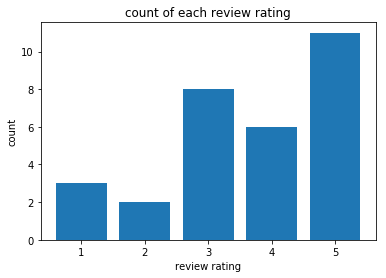

In [19]:
plt.bar([1,2,3,4,5],df_rate)

plt.xlabel('review rating') # x-axis label
plt.ylabel('count') # y-axis label
plt.title('count of each review rating') # plot title

plt.savefig('output/plot_rate_count.png', bbox_inches = 'tight', pad_inches = 0.1) # save plot as png file
plt.show()

### Investigate sentiment anomaly

In [20]:
# reviews with rating = 5
df_senti.loc[df_senti['rate'] == 1]

,text,rate,source,polarity,sentiment
27,I love noodles so much i hope too try this spi...,1,influenster,0.150000,positive
28,This product is pretty bad. It has s horrible ...,1,influenster,-0.197778,negative
29,I had high hopes for this noddles since it's b...,1,influenster,0.112000,positive


#### Review index 27

In [21]:
df_senti.iloc[27]["text"]

'I love noodles so much i hope too try this spicy chicken noodle alot of people make a challenge to eat this and i love to try the taste'

**Observation**: Review index 27 content can be considered positive but the author gave the review a rating 1 out of 5.

#### Review index 29

In [22]:
df_senti.iloc[29]["text"]

"I had high hopes for this noddles since it's been going hot for a while now. But, it didn't really taste good. It was spicy. You could handle it if you do it in one go. I was kinda disappointed."

Split review content into the three sentences.

In [23]:
TextBlob("I had high hopes for this noddles since it's been going hot for a while now.").sentiment.polarity

0.20500000000000002

In [24]:
TextBlob("But, it didn't really taste good. It was spicy.").sentiment.polarity

0.44999999999999996

In [25]:
TextBlob("You could handle it if you do it in one go. I was kinda disappointed.").sentiment.polarity

-0.75

Analyse the 2nd sentence further.

In [26]:
# expectaed value = -0.3
TextBlob("But, it didn't really taste good. It was spicy. You could handle it if you do it in one go. I was kinda disappointed.").sentiment.polarity

0.04999999999999997

In [27]:
TextBlob("didn't really taste good").sentiment.polarity

0.44999999999999996

In [28]:
TextBlob("really taste good").sentiment.polarity

0.44999999999999996

**Observation**: The sentiment function did not take into consideration of "didn't", resulting in the sentence having a positive value instead of a negative value.